<a href="https://colab.research.google.com/github/Wenndyy/Raisin-classification/blob/main/Assessment_CLO_3_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Assessment CLO-3: Tugas Pemrograman Learning</center>

<b>Topik</b>
Klasifikasi pada Raisin menggunakan Naïve Bayes

<b>Kelompok: 5 </b>

Anggota:
1. Wendy Noer Isnaeni - 1301223141
2. Yesi Sukmawati - 1301223031
3. Muh. Syahrul Minanul Aziz - 1301223369

#### Pendahuluan
![Kecimen dan Raisin](https://github.com/Wenndyy/Raisin-classification/blob/main/besni-kecimen.png?raw=true)

Kismis merupakan produk makanan yang berasal dari anggur yang dikeringkan. Dalam proses produksi dan pengolahan kismis, sering kali menghadapi masalah dalam mengidentifikasi dan pemisahan kualitas kismis. Ketika menggunakan proses manual sering kali memakan waktu, mahal dan tidak sepenuhnya akurat.
Data ini akan digunakan untuk mengklasifikasi khususnya untuk mengetahui nilai akurasi dari klasifikasi menggunakan Naïve Bayes.

Informasi Dataset
1. Area: Jumlah piksel dalam batas kismis.
2. Major axis length: Panjang sumbu utama yaitu
garis terpanjang yang dapat ditarik pada kismis.
3. Minor axis length: Panjang sumbu kecil yang
merupakan garis terpendek yang dapat ditarik
pada kismis.
4. Eccentricity: Ukuran eksentrisitas elips yang
memiliki momen yang sama dengan kismis.
5. Convex area: Jumlah piksel kulit cembung
terkecil dari wilayah yang dibentuk oleh kismis.
6. Extent: Rasio wilayah yang dibentuk oleh kismis
dengan total piksel dalam kotak pembatas.
7. Perimeter: Jarak antara batas kismis dan piksel di
sekitarnya.


Import Libraries

In [55]:
import numpy as np
import pandas as pd

# ini baru
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# ini baru
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, learning_curve

import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import scipy.stats as stats

from scipy.stats import zscore

Setting visualisasi yang nantinya akan ditampilkan

In [56]:
plt.rcParams['figure.dpi'] = 120
sns.set(rc={'axes.facecolor':'#F3E8FF'},style='darkgrid')

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read dataset dan menampilkannya

In [102]:
dataset = pd.read_excel('/content/drive/MyDrive/Raisin_Dataset.xlsx')

In [103]:
dataset

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter    Class  
0    0.758651   1184.040  Kecimen  
1    0.684130   1121.786  Kecimen  
2    0.637613   1208.575  Kecimen  
3    0.699599    844.162  Kecimen  
4    0.792772   1073.251  Kecimen  
..        ...        ...      ...  
895  0.668793   1129.072    Besni  
896  0.636476   1214.252    Besni  
897  0.741099   1292.828    Besni  
898  0.658798   1258.548    Besni  
899  0.632020   1272.862    Besni  

[900 rows x 8 columns]

Data Overview

untuk mengetahui dimensi dari suatu DataFrame sehingga dapat diketahui jumlah baris dan kolom dalam data tersebut

In [60]:
dataset.shape

(900, 8)

berdasarkan hasil kode diatas dapat diketahui bahwa dataset memiliki 900 data dan 8 kolom.

menampilkan informasi ringkas untuk mengetahui apa saja yang terdapat pada dataset.

In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


Menampilkan ringkasan statistik deskriptif untuk setiap kolom numerik.

In [62]:
dataset.describe().T

count          mean           std           min  \
Area             900.0  87804.127778  39002.111390  25387.000000   
MajorAxisLength  900.0    430.929950    116.035121    225.629541   
MinorAxisLength  900.0    254.488133     49.988902    143.710872   
Eccentricity     900.0      0.781542      0.090318      0.348730   
ConvexArea       900.0  91186.090000  40769.290132  26139.000000   
Extent           900.0      0.699508      0.053468      0.379856   
Perimeter        900.0   1165.906636    273.764315    619.074000   

                          25%           50%            75%            max  
Area             59348.000000  78902.000000  105028.250000  235047.000000  
MajorAxisLength    345.442898    407.803951     494.187014     997.291941  
MinorAxisLength    219.111126    247.848409     279.888575     492.275279  
Eccentricity         0.741766      0.798846       0.842571       0.962124  
ConvexArea       61513.250000  81651.000000  108375.750000  278217.000000  
Extent               0.670869      0.707367       0.734991       0.835455  
Perimeter          966.410750   1119.509000    1308.389750    2697.753000

untuk mengetahui berapa banyak sampel pada setiap kelas, bertujuan agar dapat memahami seimbang atau tidaknya distribusi kelas tersebut.

In [63]:
class_counts = dataset['Class'].value_counts()
print(class_counts)

Class
Kecimen    450
Besni      450
Name: count, dtype: int64


##### EDA


Visualisasi Data

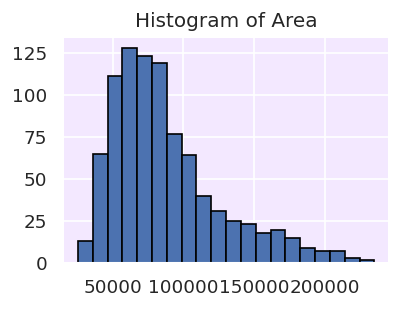

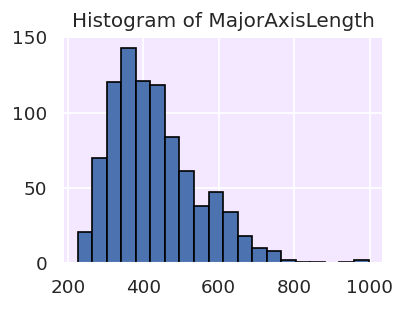

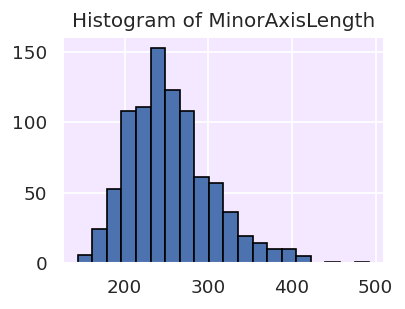

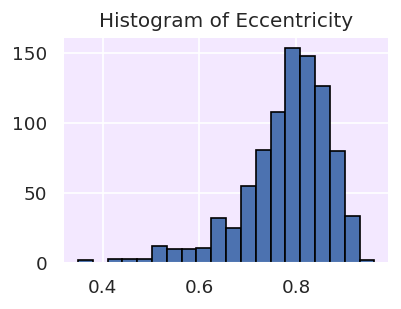

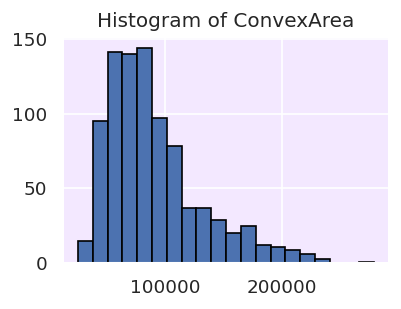

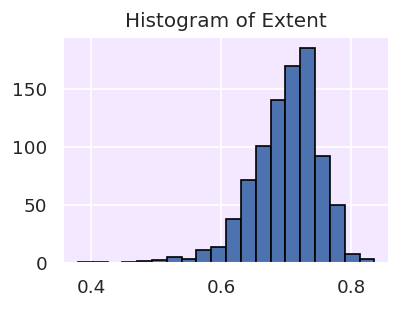

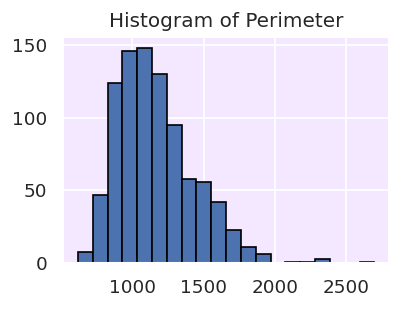

In [64]:
for column in dataset.columns:
    if dataset[column].dtype != 'O':  # Filter kolom fitur
        plt.subplot(2, 2, 1)
        plt.hist(dataset[column], bins=20, edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.tight_layout()
        plt.show()
        print("")

Berdasarkan distribusi diatas pada setiap fitur mendapatkan distribusi positif dan negatif yang merujuk pada karakteristik dari bentuk distribusi data yang berkaitan dengan posisi mean dan median.

Pada histogram diatas dikatakan memiliki distribusi positif ketika nilai median lebih besar dari median, yang mengindikasikan bahwa sebgaian besar nilai cenderung lebih besar dari rata-rata. Fitur yang memiliki distribusi positif adalah Area, MajorAxisLength, MinorAxisLength, ConvexArea, Perimeter.


Selain itu histogram diatas dikatakan memiliki distribusi positif ketika nilai median lebih kecil dari median. Fitur yang memiliki distribusi positif adalah Eccentricity dan Extent.

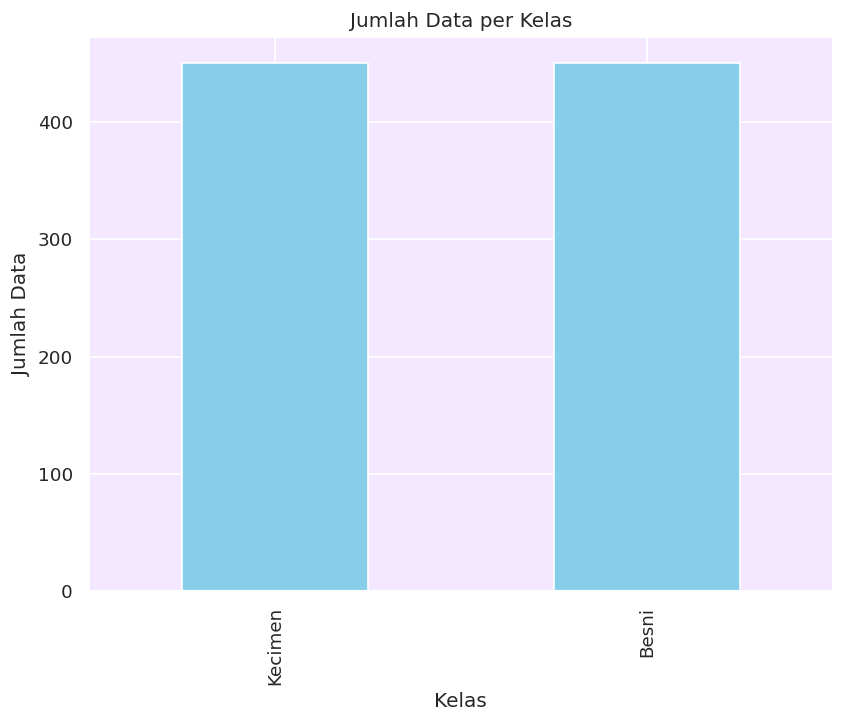

In [65]:
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Data per Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')
plt.show()

[]

<Figure size 1800x1200 with 0 Axes>

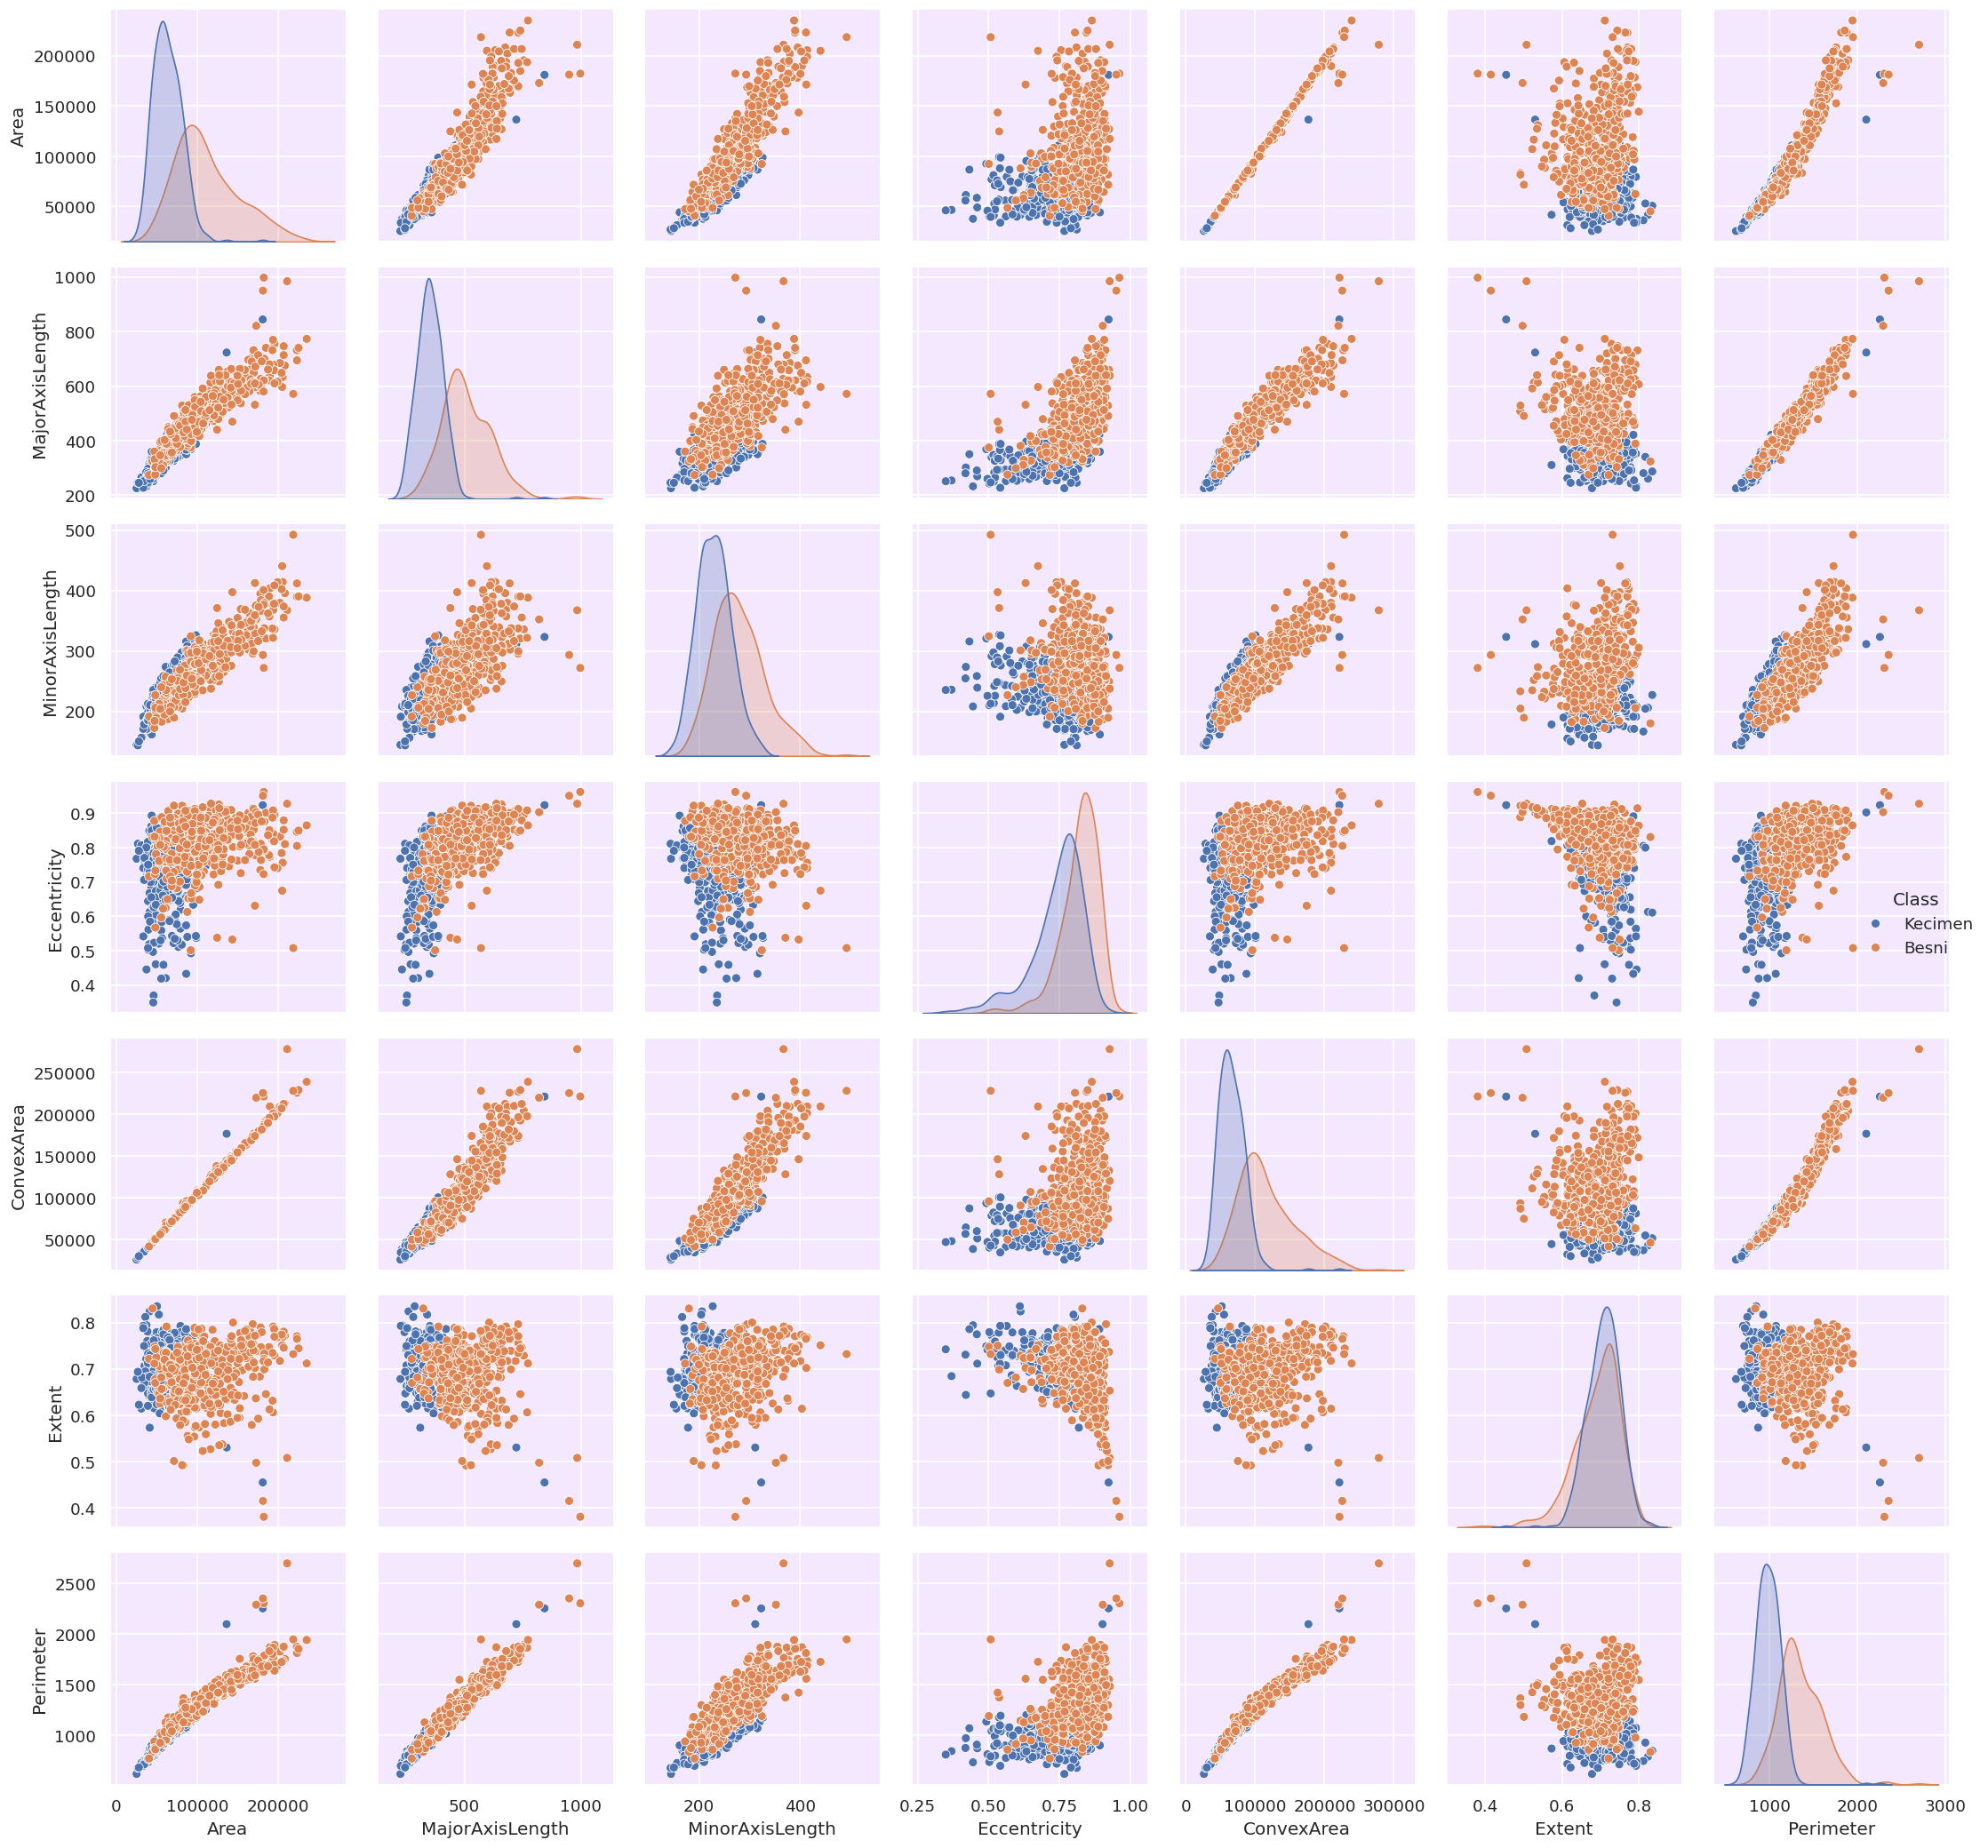

In [66]:
plt.figure(figsize=(15,10))
sns.pairplot(dataset,hue="Class")
plt.tight_layout()
plt.plot()

Analisis Korelasi

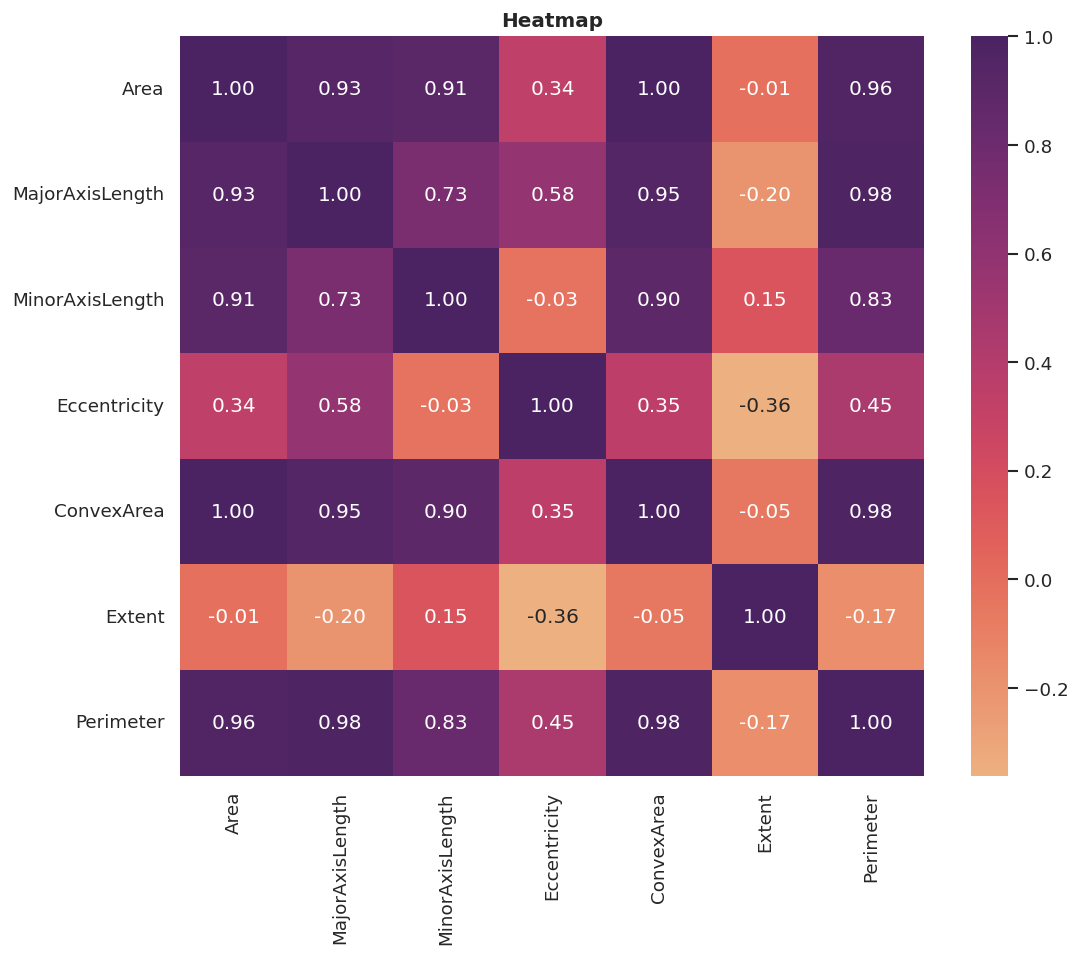

In [67]:
# defining numeric columns
num_cols = dataset.drop("Class", axis = 1)

# determinig correlation
correlation = num_cols.corr()

# defining figure size
plt.figure(figsize = (10,8))

# plot title
plt.title("Heatmap", fontweight = "bold")

# generating relevant heatmap using correlation data
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='flare')

# plotting heatmap
plt.show()

##### Data Preprocessing

Menghitung data yang terdapat pada setiap fitur

In [68]:
dataset.count()

Area               900
MajorAxisLength    900
MinorAxisLength    900
Eccentricity       900
ConvexArea         900
Extent             900
Perimeter          900
Class              900
dtype: int64

Mengecek apakah terdapat nilai yang hilang pada setiap kolom , untuk memberikan pemahaman tentang berapa banyak nilai yang hilang disetiap kolom dataset.

In [69]:
# Check the percentage of missing values in each column
missing_percent = dataset.isnull().mean().sort_values(ascending=False) * 100
print("Missing Value Percentage by Columns:\n", round(missing_percent,2))

Missing Value Percentage by Columns:
 Area               0.0
MajorAxisLength    0.0
MinorAxisLength    0.0
Eccentricity       0.0
ConvexArea         0.0
Extent             0.0
Perimeter          0.0
Class              0.0
dtype: float64


In [70]:
# Menghapus baris dengan nilai hilang
dataset.dropna(inplace=True)

In [71]:
# Menghapus duplikasi data
print("Jumlah data sebelum deduplikasi:", len(dataset))
dataset.drop_duplicates(inplace=True)
print("Jumlah data setelah deduplikasi:", len(dataset))

Jumlah data sebelum deduplikasi: 900
Jumlah data setelah deduplikasi: 900


Mendeteksi outlier menggunakan Z-Score, untuk mengukur seberapa ekstrem suatu nilai dalam konteks distribusi

In [72]:
columns_to_check = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']
z_scores = zscore(dataset[columns_to_check])
threshold = 3
outliers = (np.abs(z_scores) > threshold).any(axis=1)

# Menampilkan informasi tentang outlier
outlier_info = {
    'values': dataset[outliers].values.tolist(),
    'indices': dataset[outliers].index.tolist(),
    'total': sum(outliers)
}

print(f"Outliers:")
print(f"Indices: {outlier_info['indices']}")
print(f"Values: {outlier_info['values']}")
print(f"Total outliers: {outlier_info['total']}")

Outliers:
Indices: [13, 23, 34, 43, 85, 106, 156, 192, 197, 235, 251, 253, 290, 316, 356, 459, 483, 487, 490, 498, 506, 507, 536, 552, 579, 580, 581, 616, 668, 682, 694, 708, 769, 802, 804, 812, 829, 836, 866, 880]
Values: [[76792, 338.8575454, 291.3592017, 0.510583813, 78842, 0.772322237, 1042.77, 'Kecimen'], [61251, 301.5077895, 273.6599414, 0.419753707, 64732, 0.643595671, 971.769, 'Kecimen'], [46427, 253.8420284, 235.9068241, 0.369212459, 48275, 0.684219059, 844.312, 'Kecimen'], [92384, 368.4062138, 320.7145792, 0.492086934, 93772, 0.749006827, 1135.662, 'Kecimen'], [180898, 843.9566534, 323.1905688, 0.923770364, 221396, 0.454188929, 2253.557, 'Kecimen'], [48945, 269.3704112, 239.1621656, 0.460121209, 51456, 0.711244478, 872.289, 'Kecimen'], [45962, 251.1333844, 235.3680757, 0.348729642, 47173, 0.742280362, 810.195, 'Kecimen'], [37569, 232.4278475, 208.1520065, 0.44495009, 38874, 0.794371379, 734.102, 'Kecimen'], [86545, 350.1278744, 315.7195205, 0.432307345, 87512, 0.785886818, 10

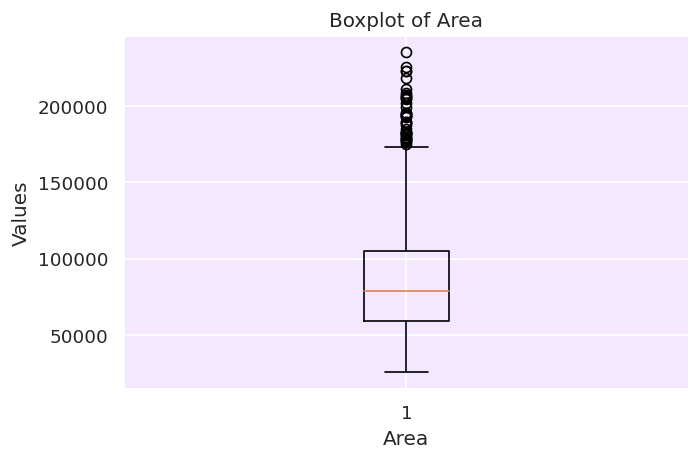

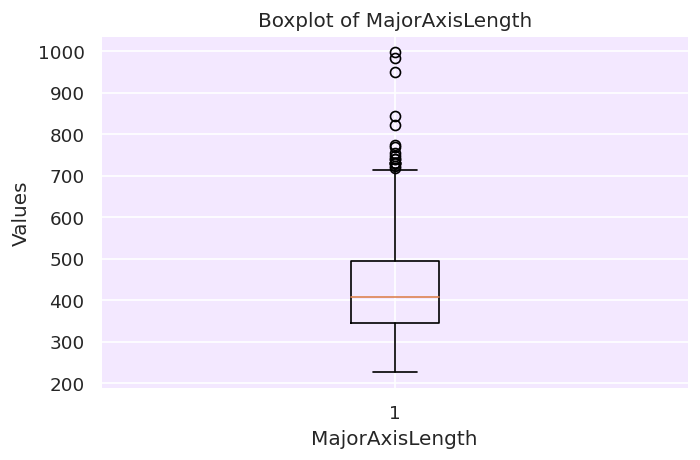

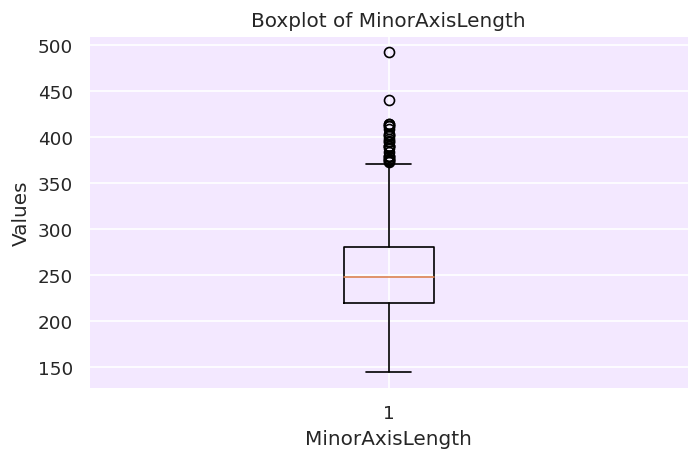

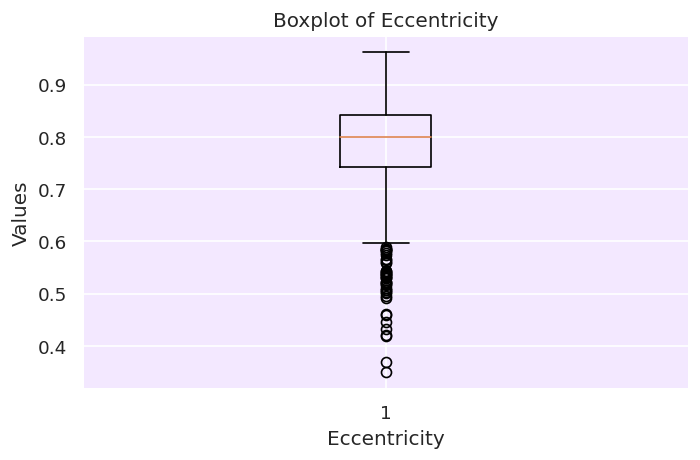

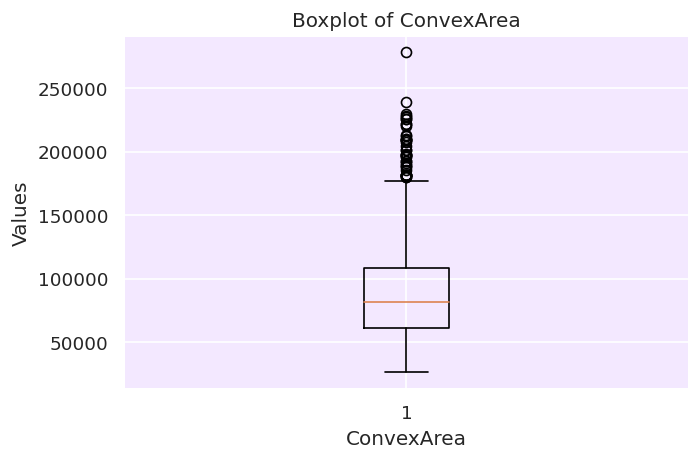

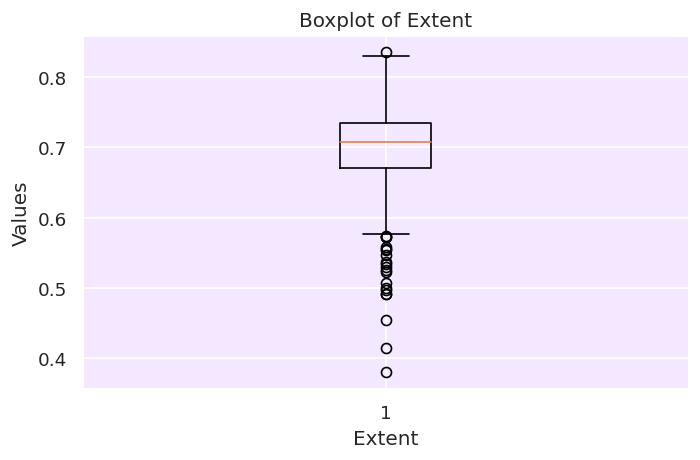

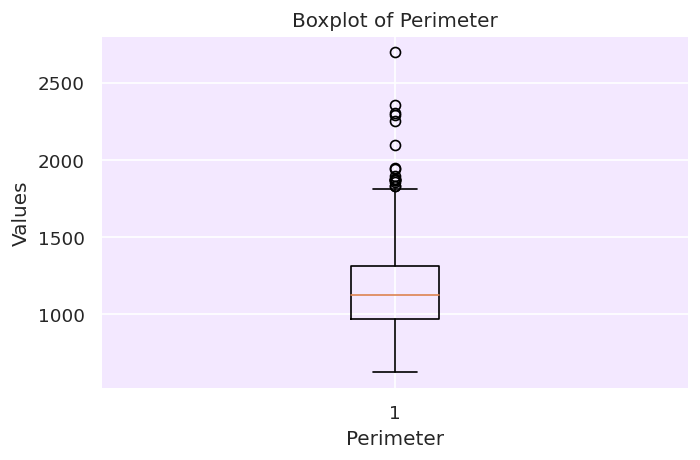

In [73]:
for column in dataset.columns:
    if column == "Class":
        continue

    plt.figure(figsize=(6, 4))
    plt.boxplot(dataset[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

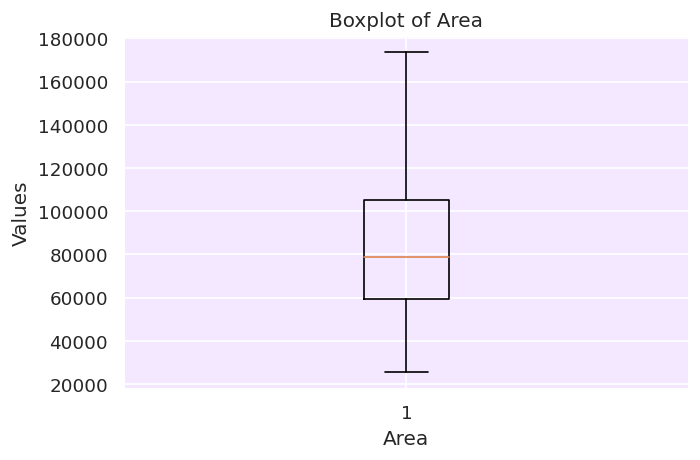

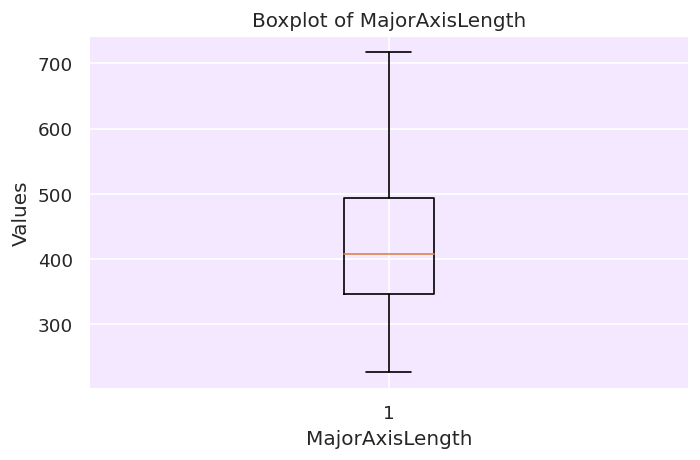

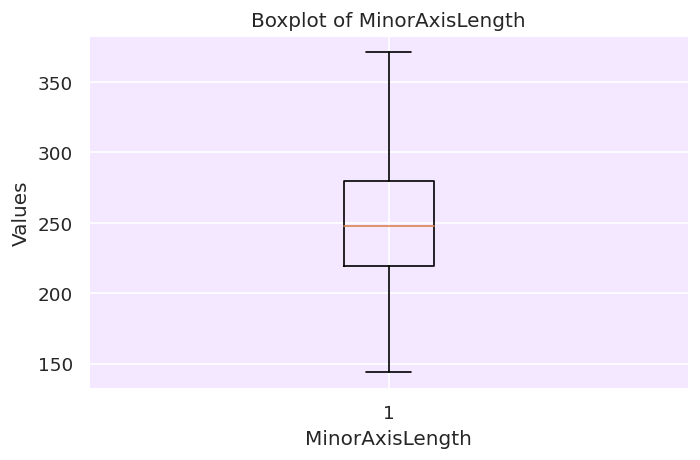

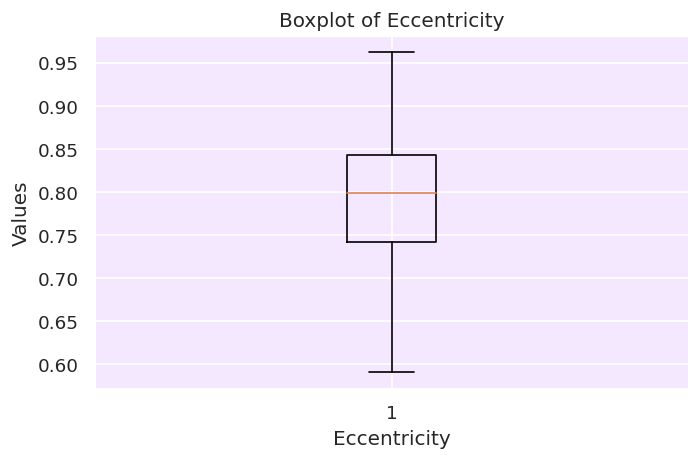

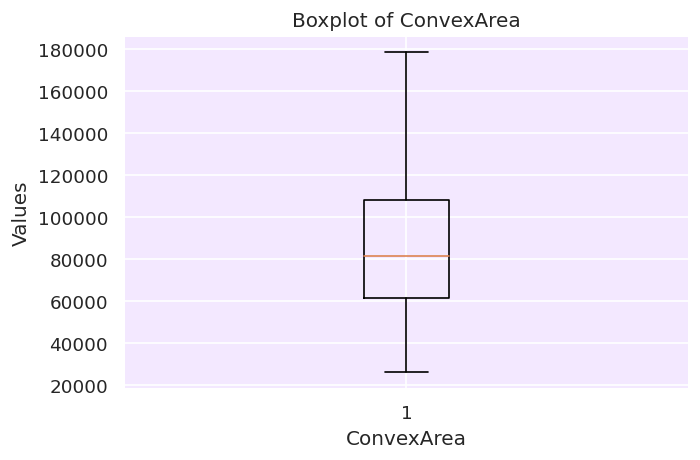

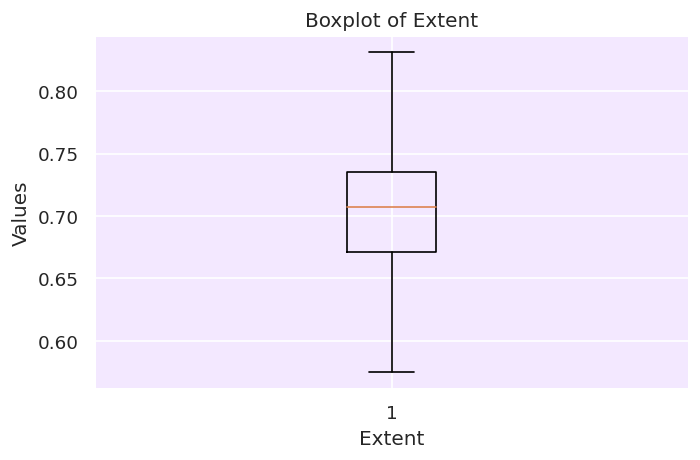

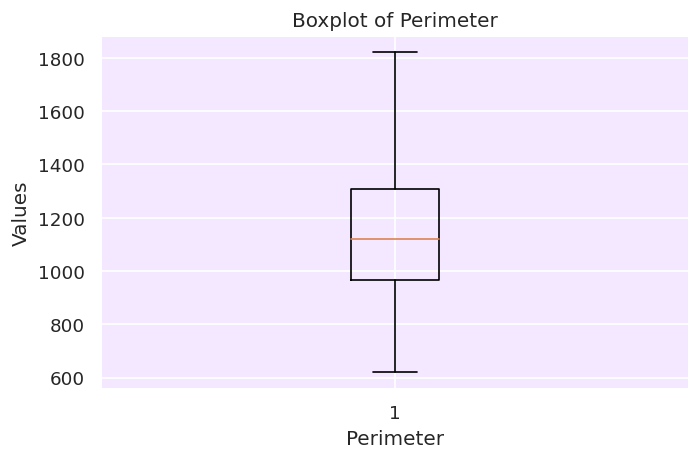

In [74]:
for column in dataset.columns:
    if column == "Class":
        continue
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    dataset[column] = np.where(
        dataset[column] > upper,
        upper,
        np.where(
            dataset[column] < lower,
            lower,
            dataset[column]
        )
    )

for column in dataset.columns:
    if column == "Class":
        continue
    plt.figure(figsize=(6, 4))
    plt.boxplot(dataset[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [75]:
columns_to_check = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']
z_scores = zscore(dataset[columns_to_check])
threshold = 3
outliers = (np.abs(z_scores) > threshold).any(axis=1)

# Menampilkan informasi tentang outlier
outlier_info = {
    'values': dataset[outliers].values.tolist(),
    'indices': dataset[outliers].index.tolist(),
    'total': sum(outliers)
}

print(f"Outliers:")
print(f"Indices: {outlier_info['indices']}")
print(f"Values: {outlier_info['values']}")
print(f"Total outliers: {outlier_info['total']}")

Outliers:
Indices: []
Values: []
Total outliers: 0


Berdasarkan analisis sebelumnya bisa diketahui bahwa, dataset lengkap mencakup 900 butir kismis, tidak terdapat mising value, dataset memiliki 40 baris yang termasuk outlier dalam data, namun setelah itu dilakukan cleaning sehingga dataset tidak memiliki outliers, jumlah data pada setiap varietas memiliki jumlah yang sama besar sebanyak 450 data

#####Data Splitting

Mengonversi data kategorikal menjadi numerik

In [76]:
en = LabelEncoder()
dataset['Class'] = en.fit_transform(dataset['Class'])


In [77]:
dataset.head(5)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524.0       442.246011       253.291155      0.819738     90546.0   
1  75166.0       406.690687       243.032436      0.801805     78789.0   
2  90856.0       442.267048       266.328318      0.798354     93717.0   
3  45928.0       286.540559       208.760042      0.684989     47336.0   
4  79408.0       352.190770       290.827533      0.590559     81463.0   

     Extent  Perimeter  Class  
0  0.758651   1184.040      1  
1  0.684130   1121.786      1  
2  0.637613   1208.575      1  
3  0.699599    844.162      1  
4  0.792772   1073.251      1

Memisahkan data menjadi fitur x dan label y

In [78]:
X = dataset.drop(columns='Class')
y = dataset.Class

In [79]:
X

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524.0       442.246011       253.291155      0.819738     90546.0   
1    75166.0       406.690687       243.032436      0.801805     78789.0   
2    90856.0       442.267048       266.328318      0.798354     93717.0   
3    45928.0       286.540559       208.760042      0.684989     47336.0   
4    79408.0       352.190770       290.827533      0.590559     81463.0   
..       ...              ...              ...           ...         ...   
895  83248.0       430.077308       247.838695      0.817263     85839.0   
896  87350.0       440.735698       259.293149      0.808629     90899.0   
897  99657.0       431.706981       298.837323      0.721684    106264.0   
898  93523.0       476.344094       254.176054      0.845739     97653.0   
899  85609.0       512.081774       215.271976      0.907345     89197.0   

       Extent  Perimeter  
0    0.758651   1184.040  
1    0.684130   1121.786  
2    0.637613   1208.575  
3    0.699599    844.162  
4    0.792772   1073.251  
..        ...        ...  
895  0.668793   1129.072  
896  0.636476   1214.252  
897  0.741099   1292.828  
898  0.658798   1258.548  
899  0.632020   1272.862  

[900 rows x 7 columns]

In [80]:
y

0      1
1      1
2      1
3      1
4      1
      ..
895    0
896    0
897    0
898    0
899    0
Name: Class, Length: 900, dtype: int64

menstandarkan fitur-fitur dalam matriks sehingga semua fitur dalam data memiliki skala yang sama

In [81]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [82]:
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=42)

print("x_train = ", len(X_train))
print("x_test = ", len(X_test))
print("y_train = ", len(y_train))
print("y_test = ", len(y_test))

x_train =  720
x_test =  180
y_train =  720
y_test =  180


Melakukan splitting data kedalam data train dan data test

### Metode yang Digunakan


Menggunakan algoritma Naive Bayes Gaussian

In [83]:

classifier = GaussianNB()

Melakukan training model

In [84]:

classifier.fit(X_train,y_train)



GaussianNB()

Melakukan prediksi berdasarkan model yang telah dibuat, dimana data yang akan diprediksi adalah x_test

In [85]:

y_pred = classifier.predict(X_test)
y_pred


array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1])

Melakukan prediksi probabilitas dari model yang telah dihasilkan

In [86]:
classifier.predict_proba(X_test)

array([[9.90441437e-01, 9.55856274e-03],
       [4.39313319e-04, 9.99560687e-01],
       [2.62992606e-06, 9.99997370e-01],
       [9.99999856e-01, 1.43805883e-07],
       [4.36091981e-06, 9.99995639e-01],
       [1.66451395e-01, 8.33548605e-01],
       [1.80242466e-05, 9.99981976e-01],
       [9.57393668e-02, 9.04260633e-01],
       [3.81974407e-03, 9.96180256e-01],
       [6.98407012e-03, 9.93015930e-01],
       [9.99853768e-01, 1.46232411e-04],
       [1.00000000e+00, 3.98415360e-12],
       [1.00000000e+00, 2.79098036e-21],
       [6.68984469e-04, 9.99331016e-01],
       [1.00000000e+00, 4.66786016e-28],
       [1.00000000e+00, 1.03069548e-24],
       [8.44751193e-01, 1.55248807e-01],
       [1.61008702e-05, 9.99983899e-01],
       [1.91834125e-03, 9.98081659e-01],
       [8.51600534e-01, 1.48399466e-01],
       [9.61491821e-04, 9.99038508e-01],
       [1.00000000e+00, 1.10677659e-11],
       [2.52970150e-05, 9.99974703e-01],
       [1.16334087e-04, 9.99883666e-01],
       [1.000000

In [87]:
akurasi = accuracy_score(y_pred,y_test)
print("Tingkat Akurasi : %d persen"%(akurasi*100))

Tingkat Akurasi : 85 persen


In [88]:
akurasi = classification_report(y_test,y_pred)
print(akurasi)

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        86
           1       0.83      0.90      0.87        94

    accuracy                           0.86       180
   macro avg       0.86      0.85      0.85       180
weighted avg       0.86      0.86      0.85       180



Untuk confusion matrix perlu membandingkan antara label y_test dan y _pred. Dari sini kita bisa memprediksi jumlah data yang benar dan jumlah data yang kurang tepat

In [89]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[69 17]
 [ 9 85]]


### Hasil dan Analisis
Silahkan double click cell ini dan tulis hasil dan analisis!

Tampilkan performa yang dihasilkan, bisa dalam tabel dan grafik, diukur berdasarkan metrik evaluasi yang dipakai.

Tuliskan hasil analisis Anda.

Berdasarkan hasil evaluasi model pada data train memiliki akurasi 0.84 atau 84%. Pada classification report menunjukan bahwa precision untuk class 0 (Kemungkinan Kecimen) adalah 0.88 yang berarti dari semua sampel diprediksi sebagai class 0, 88% diantaranya benar-benar merupakan class 0. Sedangkan recall untuk class 0 adalah 0.80 yang berarti dari semua sampel sebenrnya class 0, 80% di antaranya diprediksi dengan benar sebagai class 0.

Untuk class 1 (kemungkinan Besni), precision nya adalah 0.83, yang berarti dari semua sampel yang diprediksi sebagai class 1, 83% di antaranya benar-benar merupakan class 1. Sementara recall untuk class 1 adalah 0.90, yang berarti dari semua sampel sebenarnya class 1, 90% di antaranya diprediksi dengan benar sebagai class 1.

Secara umum, model memiliki f1-score yang cukup baik untuk kedua class, yaitu 0.84 untuk class 0 dan 0.87 untuk class 1. Namun, masih terdapat kesalahan prediksi pada kedua class yang perlu diminimalisir untuk meningkatkan performa model lebih lanjut.

Akurasi:
  Train: 0.84
  Test:                precision    recall  f1-score   support

           0       0.88      0.80      0.84        86
           1       0.83      0.90      0.87        94

    accuracy                           0.86       180
   macro avg       0.86      0.85      0.85       180
weighted avg       0.86      0.86      0.85       180



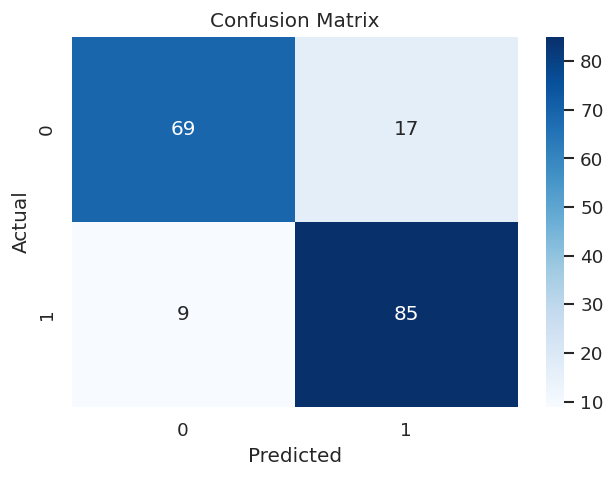

In [90]:
# Menampilkan akurasi dalam tabel
print('Akurasi:')
print(f'  Train: {classifier.score(X_train, y_train):.2f}')
print(f'  Test:  {akurasi}')

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Kesimpulan
Silahkan double click cell ini dan tulis kesimpulan berdasarkan hasil percobaan yang Anda lakukan!

1. Model klasifikasi Naive Bayes yang digunakan untuk membedakan jenis kismis Kecimen dan Besni memiliki performa yang cukup baik dengan akurasi mencapai 86% pada data tes dan 84% pada data latih.
2. Dari classification report, model memiliki precision yang tinggi untuk kedua kelas, yaitu 0.88 untuk kelas Kecimen dan 0.83 untuk kelas Besni. Ini menunjukkan bahwa ketika model memprediksi suatu sampel sebagai kelas tertentu, prediksinya cukup akurat.
3. Recall model juga cukup tinggi, yaitu 0.80 untuk kelas Kecimen dan 0.90 untuk kelas Besni. Ini berarti sebagian besar sampel dari masing-masing kelas dapat diprediksi dengan benar oleh model.
4. F1-score yang merupakan harmonic mean dari precision dan recall juga cukup baik, yaitu 0.84 untuk kelas Kecimen dan 0.87 untuk kelas Besni.

Secara keseluruhan, model Naive Bayes ini memberikan hasil yang memuaskan dalam mengklasifikasikan jenis kismis Kecimen dan Besni berdasarkan fitur-fitur yang diberikan.



---



1. analisis terhadap dataset
2. kita harus pengecekan terhadap yang duplikasi
3. cek data yang kosong apa engga, kalau kosong gimana
4. datanya lebih ke atribut kemana korelasi antar atribut
5. cek dataset yang mau jadi data test
6. mulai masuk ke teori kasih cerita konsep metodenya gimana, langkahnya gimana bagusnya ada flowchartnya
7. validation data traning sama tracing
8. kalau 5 volt dibagi jadi 20 20 20 buat cek akurasinya
9. variabel yang bisa di cek jadi tolak ukur
10. harus tau yang di setting apa hyper parameter
11. grafik, dia landai brp akurasinya dll
12. heatmep itu klo minus apa
13. hrus ada analisis gambaran dri kismin

2. kita harus pengecekan terhadap yang duplikasi

In [91]:
# Check for duplicate rows
duplicates = dataset.duplicated().sum()
print(f'Jumlah baris duplikat: {duplicates}')

Jumlah baris duplikat: 0


3. cek data yang kosong apa engga, kalau kosong gimana

In [92]:
missing_values = dataset.isnull().sum()
print(f'Periksa data yang hilang:\n{missing_values}')

Periksa data yang hilang:
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


4. datanya lebih ke atribut kemana korelasi antar atribut

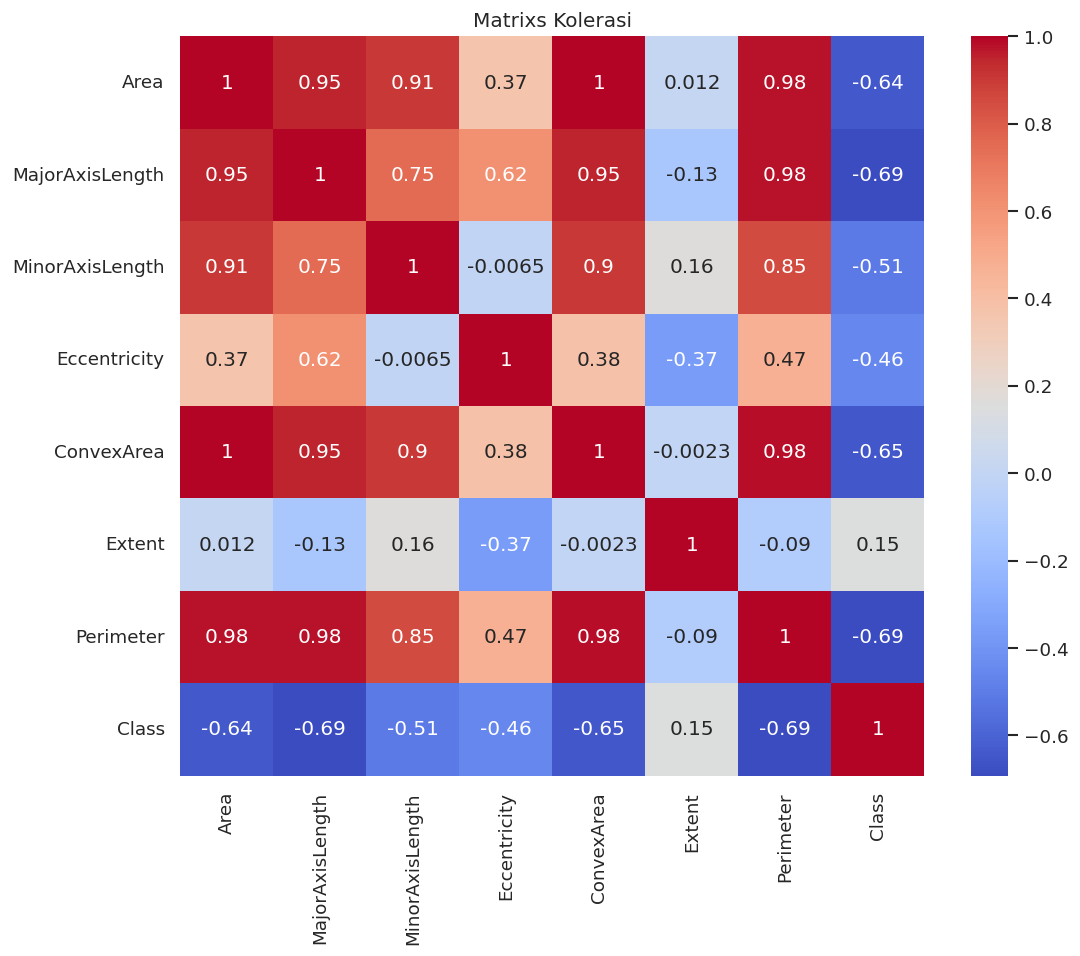

In [93]:
# Calculate correlation matrix
correlation_matrix = dataset.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrixs Kolerasi')
plt.show()

5. cek dataset yang mau jadi data test

In [94]:
# Split the dataset into training and testing sets
X = dataset.drop('Class', axis=1)
y = dataset['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training ukuran data test: {X_train.shape[0]}')
print(f'Testing ukuran data test: {X_test.shape[0]}')

Training ukuran data test: 720
Testing ukuran data test: 180


6. mulai masuk ke teori kasih cerita konsep metodenya gimana, langkahnya gimana bagusnya ada flowchartnya

7. validation data traning sama tracing

In [95]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

Cross-validation scores: [0.82638889 0.84027778 0.89583333 0.8125     0.88888889]
Mean cross-validation score: 0.8527777777777779


8. kalau 5 volt dibagi jadi 20 20 20 buat cek akurasinya

In [96]:
# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Dataset cek akurasi: {accuracy}')

Dataset cek akurasi: 0.8555555555555555


9. variabel yang bisa di cek jadi tolak ukur

In [97]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.8555886243386241
Recall: 0.8555555555555555
F1 Score: 0.8554661162710699


10. harus tau yang di setting apa hyper parameter

In [98]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit random search
random_search.fit(X_train, y_train)

# Best parameters and best score
print(f'Best parameters: {random_search.best_params_}')
print(f'Best cross-validation score: {random_search.best_score_}')

Best parameters: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 10}
Best cross-validation score: 0.8583333333333332


11. grafik, dia landai brp akurasinya dll

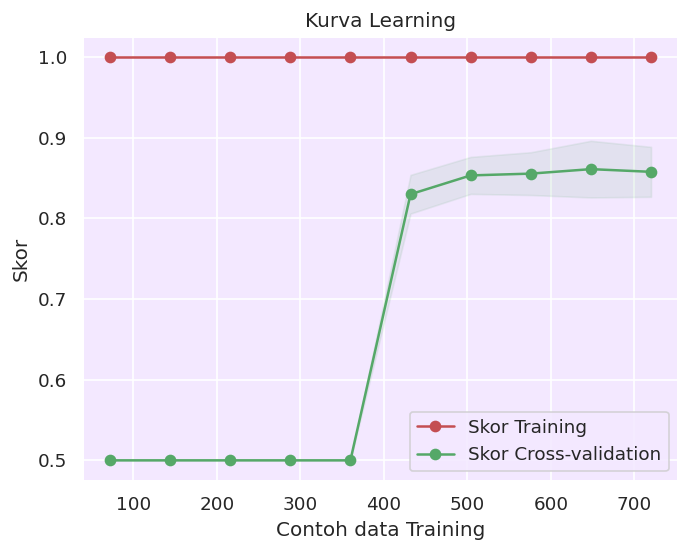

In [99]:
# Learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Skor Training")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Skor Cross-validation")
plt.title('Kurva Learning')
plt.xlabel('Contoh data Training')
plt.ylabel('Skor')
plt.legend(loc="best")
plt.show()

12. heatmep itu klo minus apa

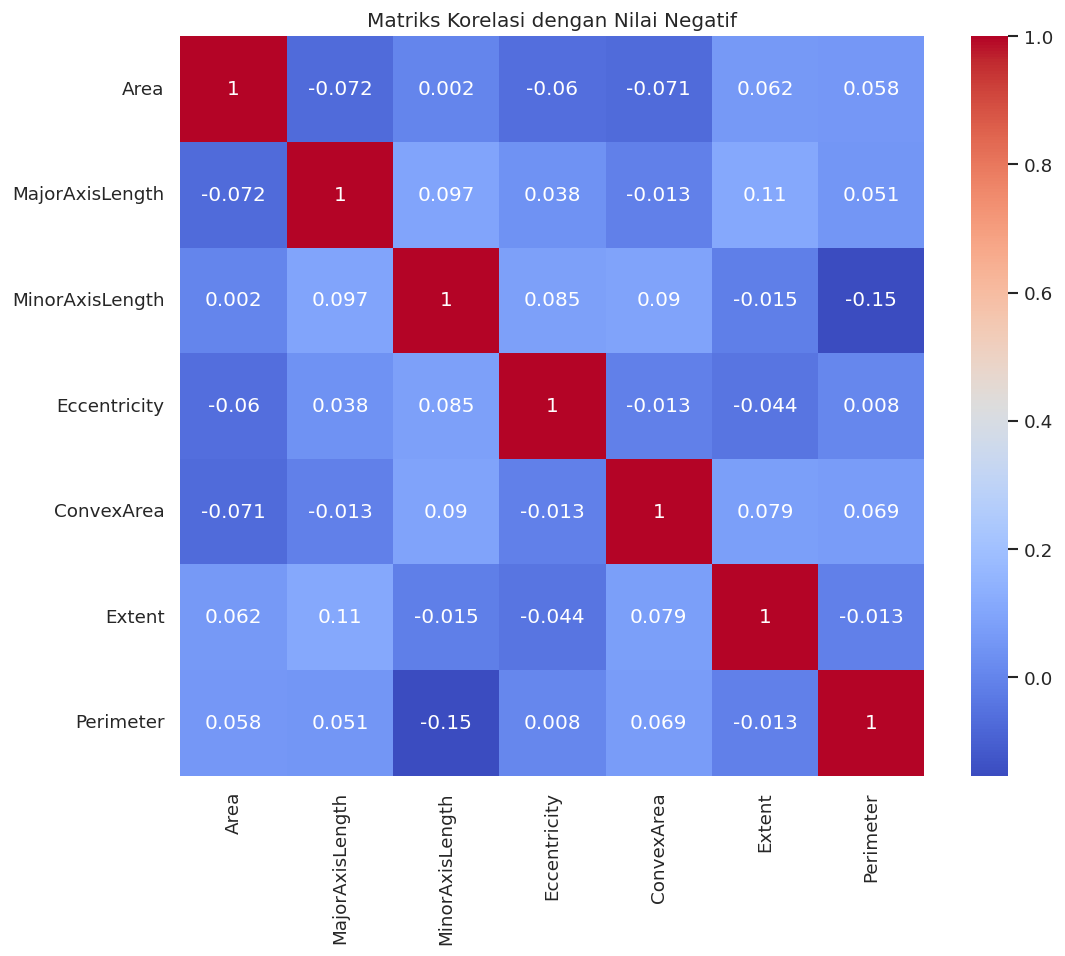

In [100]:
data = {
    'Area': np.random.randn(100),
    'MajorAxisLength': np.random.randn(100),
    'MinorAxisLength': np.random.randn(100),
    'Eccentricity': np.random.randn(100),
    'ConvexArea': np.random.randn(100),
    'Extent': np.random.randn(100),
    'Perimeter': np.random.randn(100)
}

df_negative = pd.DataFrame(data)

# Calculate correlation matrix
correlation_matrix_negative = df_negative.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_negative, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi dengan Nilai Negatif')
plt.show()

13. hrus ada analisis gambaran dri kismin

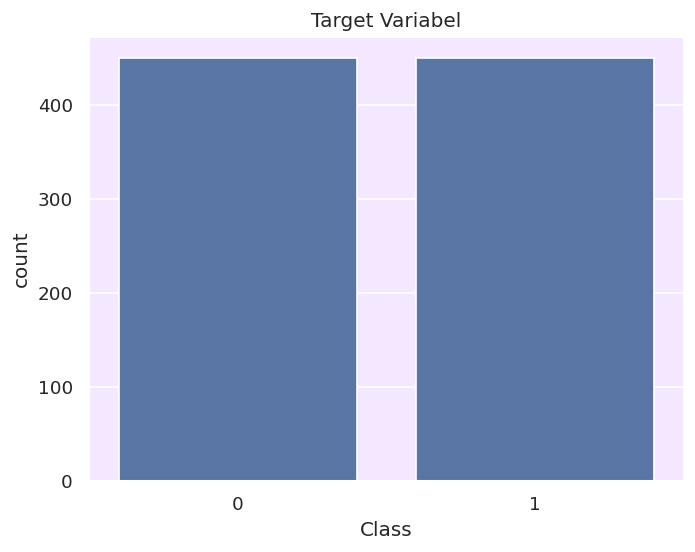

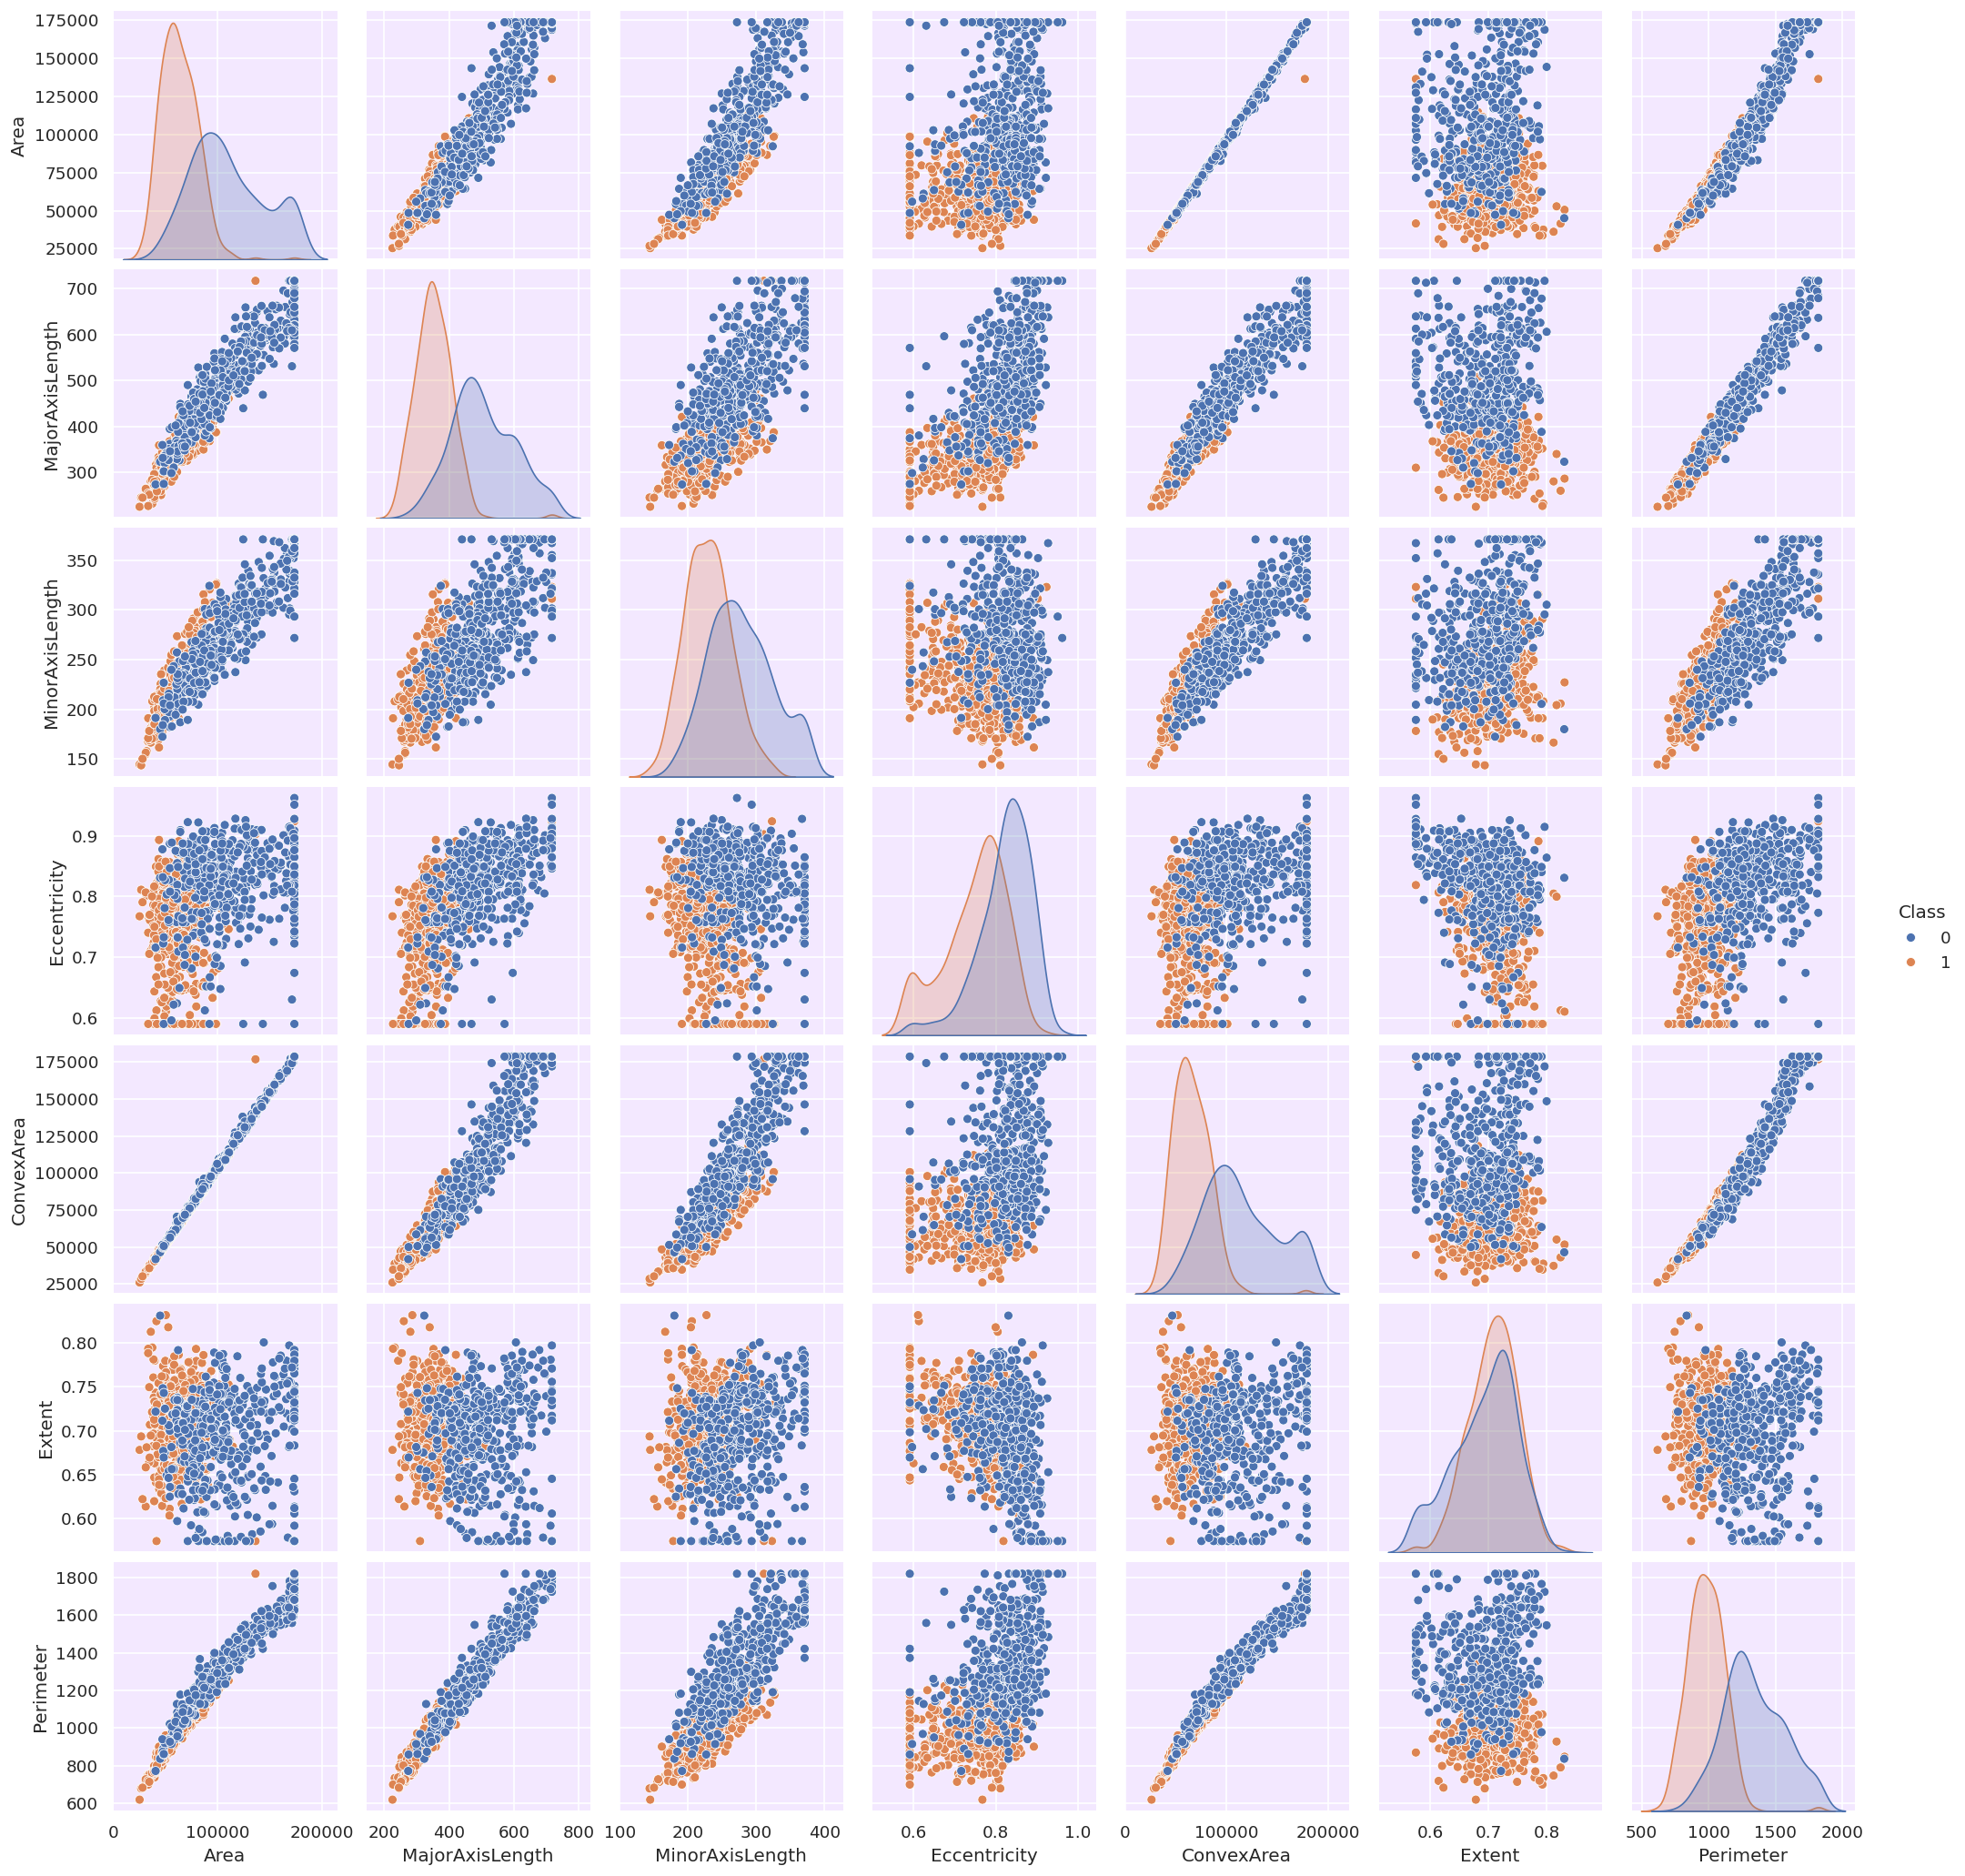

In [101]:
sns.countplot(x='Class', data=dataset)
plt.title('Target Variabel')
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(dataset, hue='Class')
plt.show()